#### 2023-2 DSL 정규세션 과제
##### Unsupervised Learning
 - 작성자 : 장현빈
 - 과제 제출 기한 : 2023.08.05. (토) 23:59
 ---


- 이름 : 김현동
- 기수 : 9기

1. 세션에서 다룬 Feature Extraction 알고리즘을 적용하여 차원 축소 결과를 확인해봅시다.
2. 데이터에 대해, PCA 수행 결과를 여러 클러스터링 알고리즘을 가지고 수행한 뒤 평가해봅시다.
3. KPCA, t-SNE, UMAP을 가지고 k-means 클러스터링까지 완료하여 성능을 평가해봅시다.

**문제는 총 Q-1(1-3), Q-2(1-6), Q-3(1-3)과 코드 실행을 위한 빈칸으로 이루어져 있습니다!

**과제 제출 시 파일명을 과제 파일명의 'yourname' 부분만 본인의 이름(영어)로 바꾸어 제출 부탁드립니다!

#0. 기본 라이브러리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
import warnings
warnings.filterwarnings('ignore')

#1. 데이터별로 다양한 차원축소 알고리즘을 수행해보기

In [3]:
import mpl_toolkits.mplot3d
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state
from sklearn import manifold, decomposition
from matplotlib import ticker
from sklearn import datasets, manifold

##1) Sphere Data Example

In [4]:
#차원 축소 학습을 진행하기 위한 변수를 설정해줍니다.
n_neighbors = 10
n_samples = 1000

In [5]:
#원본이 되는 기하학적인 구형 데이터를 만들어줍니다.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

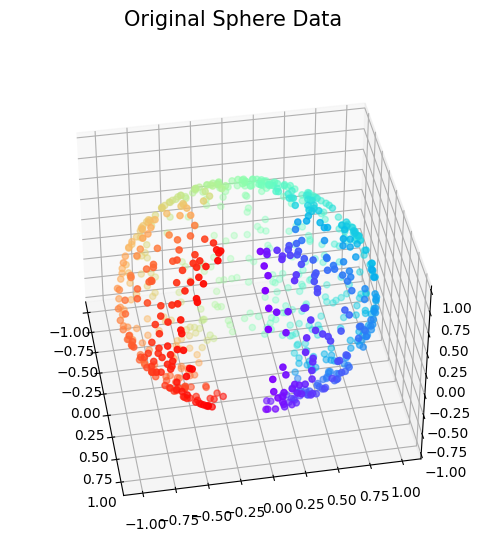

In [6]:
#3차원 원본 데이터를 확인해봅시다!
fig = plt.figure(figsize=(6, 6))
plt.suptitle(
    "Original Sphere Data", fontsize=15
)

ax = fig.add_subplot(projection="3d")
ax.scatter(x, y, z, c=colors, cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T
plt.show()

In [7]:
#여러 가지 차원 축소 알고리즘을 사용해봅시다.
feature_extraction = ["PCA", "MDS", "KPCA", "Isomap", "LLE", "t-SNE"]

PCA: 0.02 sec
MDS: 1.4 sec
KPCA: 3.6e-06 sec
Isomap: 0.54 sec
LLE: 0.27 sec
t-SNE: 7 sec


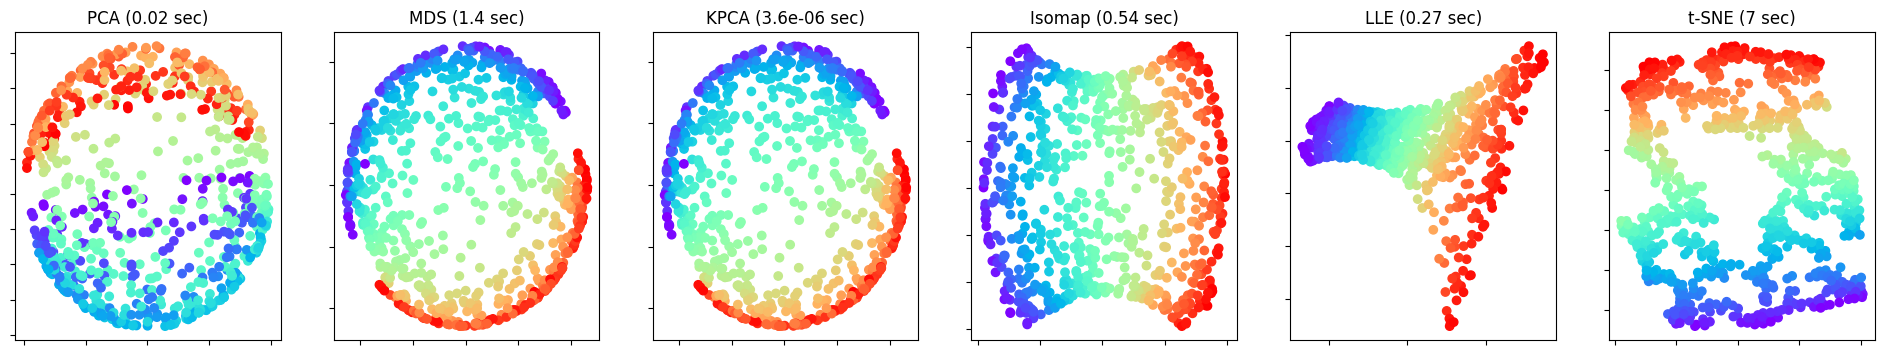

In [8]:
plots = []
fig, axes = plt.subplots(nrows=1, ncols=len(feature_extraction), figsize=(24, 4))

#세션에서 다룬 Unsupervised feature extraction 알고리즘들을 적용해봅시다!
for i, algorithm in enumerate(feature_extraction, start=1):
    t0 = time()

    if algorithm == "PCA":
        pca = decomposition.PCA(n_components=2)
        trans_data = pca.fit_transform(sphere_data).T

    elif algorithm == "MDS":
        mds = manifold.MDS(n_components=2, max_iter=100, n_init=1, random_state=0)
        trans_data = mds.fit_transform(sphere_data).T

    elif algorithm == "KernelPCA":
        kernel_pca = decomposition.KernelPCA(n_components=2, kernel='rbf')
        trans_data = kernel_pca.fit_transform(sphere_data).T

    elif algorithm == "Isomap":
        trans_data = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(sphere_data).T

    elif algorithm == "LLE":
        trans_data = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2).fit_transform(sphere_data).T

    elif algorithm == "t-SNE":
        tsne = manifold.TSNE(n_components=2, random_state=0)
        trans_data = tsne.fit_transform(sphere_data).T

    t1 = time()
    print("%s: %.2g sec" % (algorithm, t1 - t0))

    ax = axes[i - 1]
    ax.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    ax.set_title("%s (%.2g sec)" % (algorithm, t1 - t0))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.axis("tight")

plt.show()

##2) S-curve Data Example

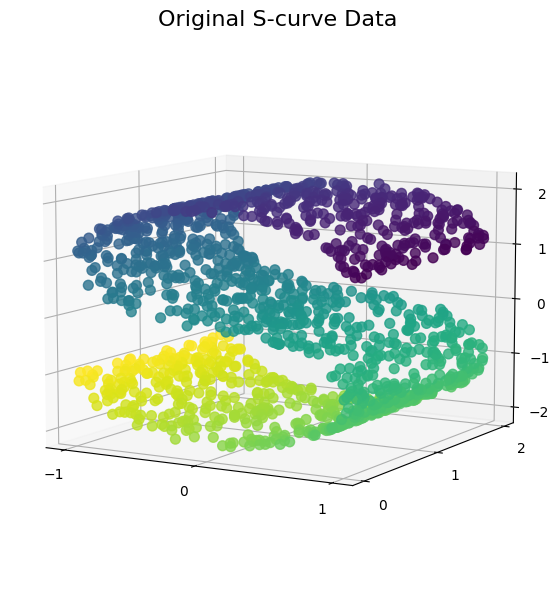

In [9]:
#sample의 수를 지정해줍니다.
n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

#원본이 되는 기하학적 구조의 S-curve Data를 만들어봅시다.
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

plot_3d(S_points, S_color, "Original S-curve Data")

In [10]:
#여러 가지 차원 축소 알고리즘을 사용해봅시다.
feature_extraction = ["PCA", "MDS", "KPCA", "Isomap", "LLE", "t-SNE"]

PCA: 0.0034 sec
MDS: 7.5 sec
KPCA: 2.4e-06 sec
Isomap: 1.2 sec
LLE: 0.24 sec
t-SNE: 13 sec


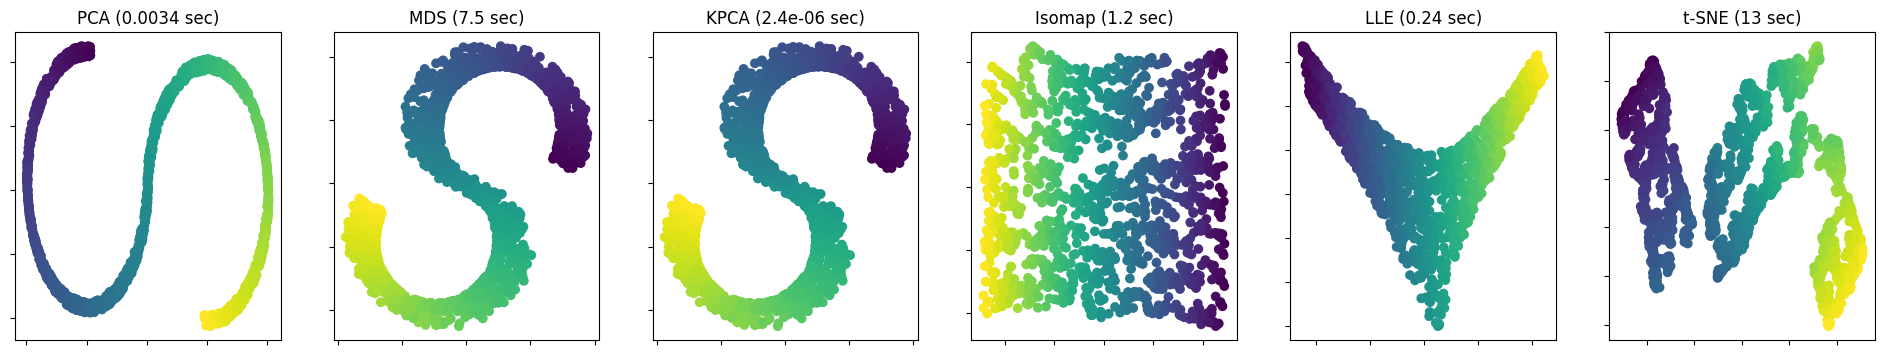

In [11]:
plots = []
fig, axes = plt.subplots(nrows=1, ncols=len(feature_extraction), figsize=(24, 4))

#세션에서 다룬 Unsupervised feature extraction 알고리즘들을 적용해봅시다!
for i, algorithm in enumerate(feature_extraction):
    t0 = time()

    if algorithm == "PCA":
        pca = decomposition.PCA(n_components=2)
        trans_data = pca.fit_transform(S_points).T

    elif algorithm == "MDS":
        mds = manifold.MDS(n_components=2, max_iter=100, n_init=1, random_state=0)
        trans_data = mds.fit_transform(S_points).T

    elif algorithm == "KernelPCA":
        kernel_pca = decomposition.KernelPCA(n_components=2, kernel='rbf')
        trans_data = kernel_pca.fit_transform(S_points).T

    elif algorithm == "Isomap":
        trans_data = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(S_points).T

    elif algorithm == "LLE":
        trans_data = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2).fit_transform(S_points).T

    elif algorithm == "t-SNE":
        tsne = manifold.TSNE(n_components=2, random_state=0)
        trans_data = tsne.fit_transform(S_points).T

    t1 = time()
    print("%s: %.2g sec" % (algorithm, t1 - t0))

    axes[i].scatter(trans_data[0], trans_data[1], c=S_color)
    axes[i].set_title("%s (%.2g sec)" % (algorithm, t1 - t0))
    axes[i].xaxis.set_major_formatter(ticker.NullFormatter())
    axes[i].yaxis.set_major_formatter(ticker.NullFormatter())
    axes[i].axis("tight")

plt.show()

##result

####Q1-1. Sphere Data Example과 S-curve Data Example에서 각각, 어떠한 feature extraction 방식을 적용한 것이 가장 효과적이라고 생각하며 그 이유는 무엇입니까? (정답이 있는 질문이 아닙니다!)
**절대적으로 모든 상황에 효과적인 차원 축소 방식은 없으며, 데이터의 구조나 분석의 목적에 따라 적합한 방식을 선택하는 것이 필요합니다.

Sphere Data Example의 경우: Isomap과 t-SNE가 구형의 데이터를 2차원에서 각각 x축과 y축 방향으로 잘 펼쳐놓아주었기 때문에 가장 효과적인 차원 축소 방법이라고 생각한다.
S-curve Data Example의 경우: Isomap이 S형의 데이터를 2차원에서 x축 방향으로 펼쳐놓아주었기 때문에 가장 효과적인 차원 축소 방법이라고 생각한다.

####Q1-2. Sphere Data Example과 S-curve Data Example에서 각각, 가장 성능이 나쁜 알고리즘이 무엇이었다고 생각하며 왜 그러한 결과가 나타났다고 생각하십니까? (정답이 있는 질문이 아닙니다!)

Sphere Data Example: PCA의 경우 구성 요소들이 잘 분류가 되지 않은 모습을 확인할 수 있다.
S-curve Data Example: PCA, MDS, KPCA 등이 구성 요소가 잘 분리되지 않은 모습을 확인할 수 있다.

#2. PCA 수행 결과에 여러 클러스터링 알고리즘을 수행해보기

##1) with iris data set

###데이터 & 라이브러리

In [12]:
#iris 데이터 불러오기(라벨을 제거한 데이터)
data = pd.read_csv('/content/drive/MyDrive/DSL/2023_2/기초세션/[230725]_Unsupervised_Learning/iris_data.csv')

In [13]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import time

###데이터 전처리

In [15]:
#데이터를 스케일링 해줍니다.
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

####Q2-1. 데이터를 스케일링 해주는 이유에 대해서 작성해주세요.

스케일링 되지 않은 데이터는 각 요소의 분포에 따라 중요도가 다르게 반영되는 효과가 발생할 수 있어 스케일링을 통해 분포를 동일하게 맞춰준다.

###PCA 수행

In [16]:
pca = PCA(n_components = 4) #feature의 수만큼 PCA를 수행해 주세요.(hint: 위의 데이터 프레임을 확인해보세요!)
pca_data = pca.fit_transform(scaled_data)

In [17]:
explained_variance = pca.explained_variance_ratio_

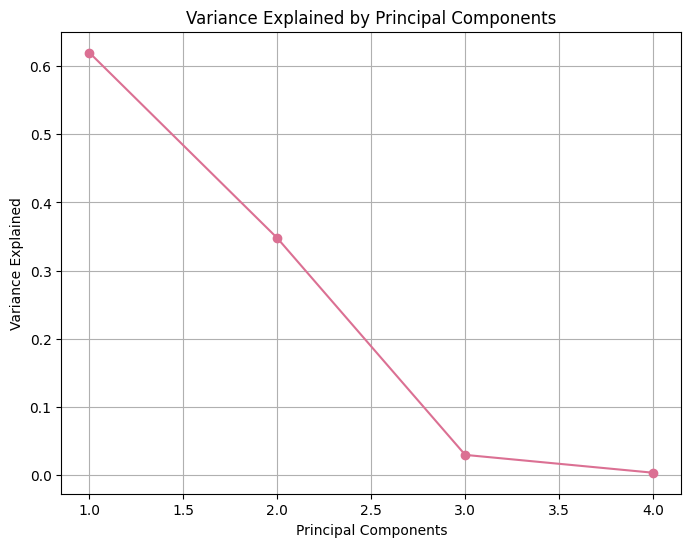

In [18]:
#주성분마다 설명할 수 있는 분산에 대한 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='palevioletred')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.grid()
plt.show()

In [19]:
#주성분에 따라 분산의 누적을 계산합니다.
cumulative_variance = np.cumsum(explained_variance)

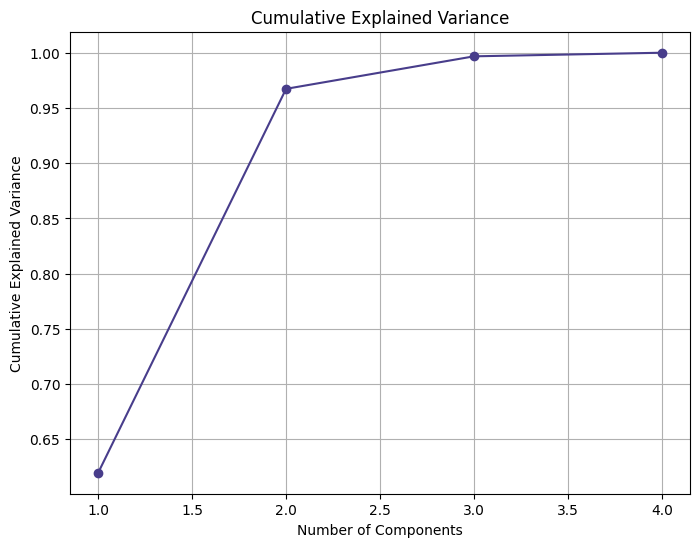

In [20]:
#주성분 수에 따른 누적 분산 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='darkslateblue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid()
plt.show()

####Q2-2. 몇 번째 주성분까지 선택하여 사용할 것인지와 그 이유를 작성해주세요.

2개의 주성분만을 선택해도 95%가 넘는 설명력을 지니기 때문에 2개 사용

In [21]:
n_components = 2 #위에서 답변한 주성분의 개수를 입력해주세요.

In [22]:
#최종적으로 지정해준 수 만큼 PCA 결과, 차원이 축소됩니다.
pca_result = PCA(n_components = n_components)
components_result = pca.fit_transform(scaled_data)

In [23]:
#선택한 주성분이 최종적으로 전체 분산 중 얼마를 설명할 수 있는지 확인할 수 있습니다.
for i in range(1, n_components+1):
  explained=np.sum(pca.explained_variance_ratio_[:i])
  print('The variance explained by the ', i, 'latent variables is {:.2f}%'.format(explained*100))

The variance explained by the  1 latent variables is 61.97%
The variance explained by the  2 latent variables is 96.73%


###(1) k-means Clustering

In [24]:
from sklearn.cluster import KMeans

In [81]:
n_centroids = 2 #직접 중심점 수(=클러스터 수)를 지정해주세요. 여러 번 수행해보면서 클러스터링 결과가 좋을 때까지 변경해보세요!

In [82]:
#k-means Clustering을 수행합니다.
start_time = time.time()

kmeans = KMeans(n_clusters = n_centroids, random_state = 17)
kmeans_clusters = kmeans.fit_predict(components_result)

end_time = time.time()
kmeans_time = end_time - start_time #k-means Clustering이 수행되는 시간을 구합니다.

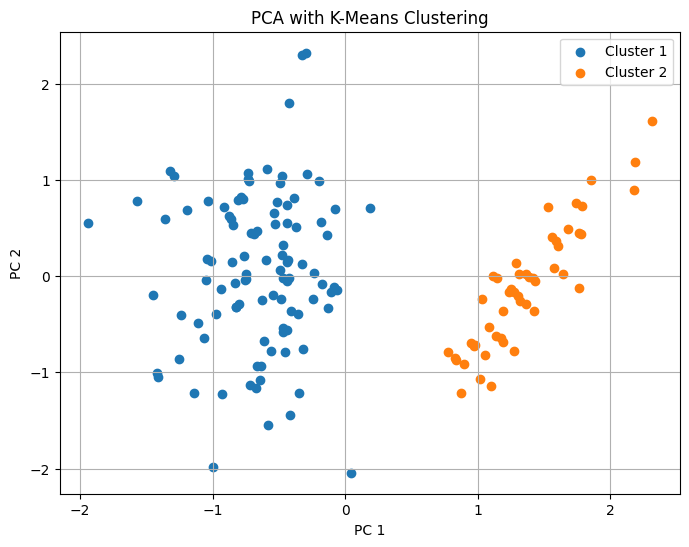

Clustering Time: 0.1084 seconds


In [83]:
#k-means Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_centroids):
    plt.scatter(components_result[kmeans_clusters == cluster_num, 0],
                components_result[kmeans_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with K-Means Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {kmeans_time:.4f} seconds") #k-means Clustering이 수행되는 시간을 출력합니다.

###(2) GMM Clustering

In [37]:
from sklearn.mixture import GaussianMixture

In [72]:
n_gaussians = 2
 #직접 가우시안 분포의 수(=클러스터 수)를 지정해주세요. 여러 번 수행해보면서 클러스터링 결과가 좋을 때까지 변경해보세요!

In [73]:
#GMM Clustering을 수행합니다.
start_time = time.time()

gmm = GaussianMixture(n_components=n_gaussians, random_state=17)
gmm_clusters = gmm.fit_predict(components_result)

end_time = time.time()
gmm_time = end_time - start_time #GMM Clustering이 수행되는 시간을 구합니다.

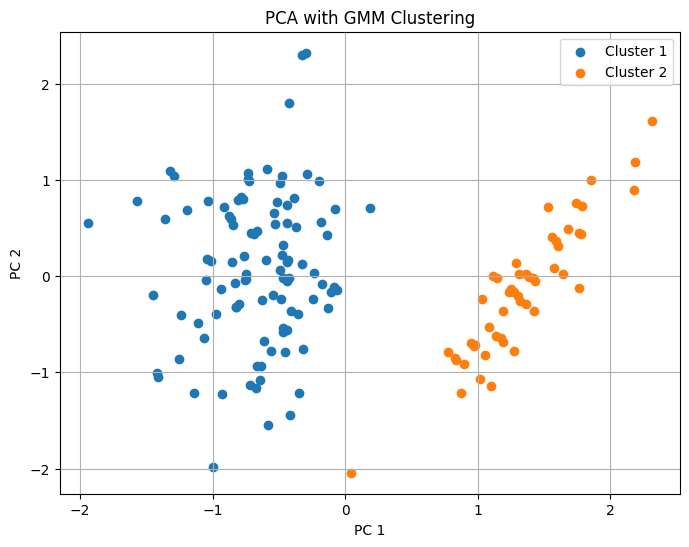

Clustering Time: 0.0356 seconds


In [74]:
#GMM Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_gaussians):
    plt.scatter(components_result[gmm_clusters == cluster_num, 0],
                components_result[gmm_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with GMM Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {gmm_time:.4f} seconds") #GMM Clustering이 수행되는 시간을 출력합니다.

###(3) Hierarchical Clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

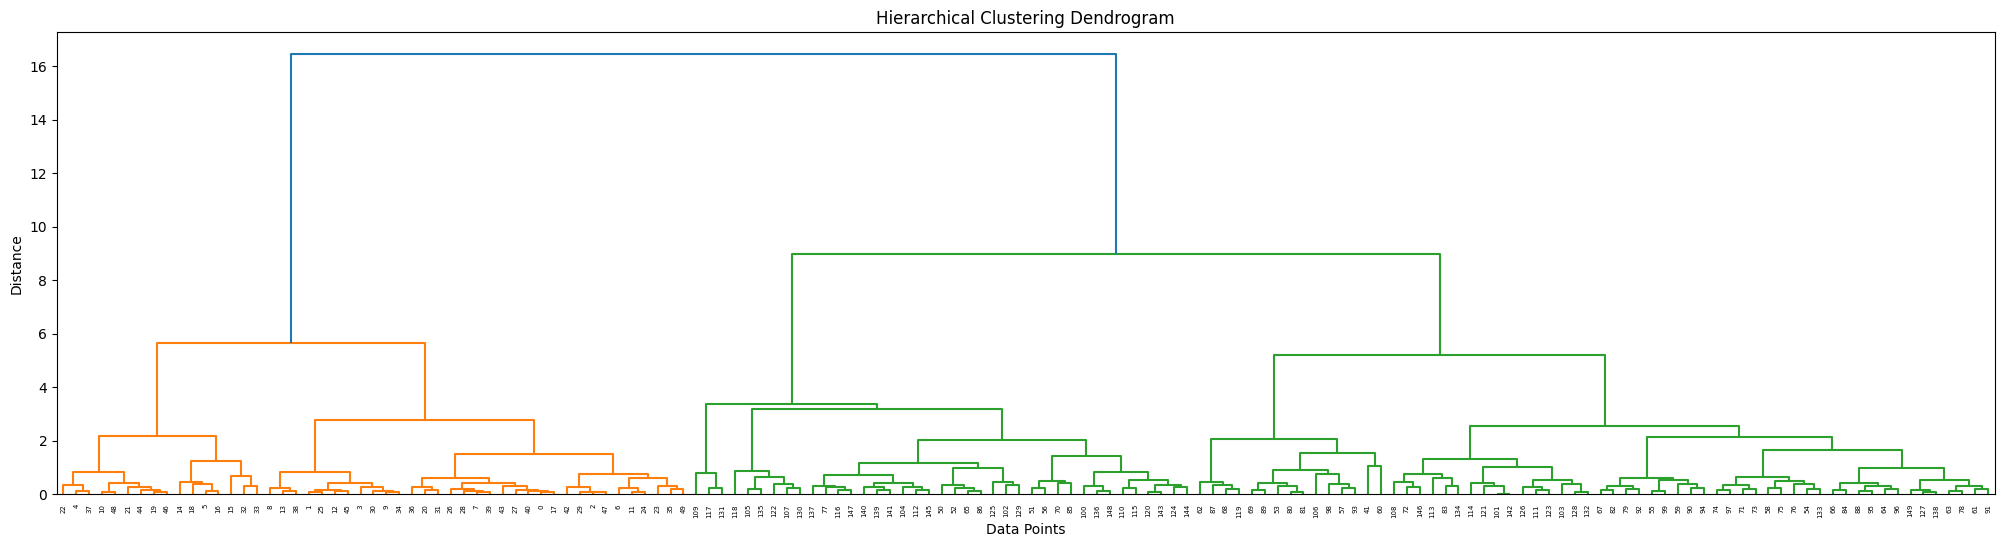

In [45]:
#덴드로그램을 그려봅니다.
start_time = time.time()

linkage_matrix = linkage(components_result, method='ward')
plt.figure(figsize=(25, 6))
dendrogram(linkage_matrix, labels=None)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

end_time = time.time()
dendrogram_time = end_time - start_time

In [46]:
n_clusters = 2 #위의 덴드로그램을 보고 몇 개의 클러스터를 만들 것인지 지정해주세요. 여러 번 수행해보면서 클러스터링 결과가 좋을 때까지 변경해보세요!

In [47]:
#Hierarchical Clustering을 수행합니다.
start_time = time.time()

hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_clusters = hierarchical.fit_predict(components_result)

end_time = time.time()
clustering_time = end_time - start_time #Hierarchical Clustering이 수행되는 시간을 구합니다.

In [48]:
hierarchical_time = dendrogram_time + clustering_time

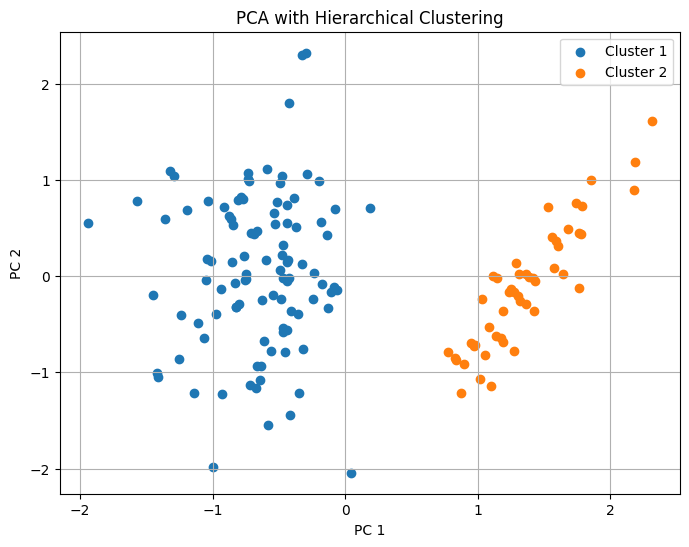

Clustering Time: 2.5558 seconds


In [49]:
#Hierarchical Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_clusters):
    plt.scatter(components_result[hierarchical_clusters == cluster_num, 0],
                components_result[hierarchical_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with Hierarchical Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {hierarchical_time:.4f} seconds") #Hierarchical Clustering이 수행되는 시간을 출력합니다.

###(4) DBSCAN Clustering

In [50]:
from sklearn.cluster import DBSCAN

In [63]:
#DBSCAN을 수행하기 위한 반경과 minPts를 지정해줍니다. 여러 번 수행하면서 결과가 잘 나오게끔 값을 변경해보세요!
eps = 0.8 #작은 값으로 입력해보다가 조금 큰 값으로 변경해보세요!
minPts = 6

In [64]:
#DBSCAN을 수행합니다.
start_time = time.time()

dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan_clusters = dbscan.fit_predict(components_result)

end_time = time.time()
dbscan_time = end_time - start_time #DBSCAN이 수행되는 시간을 구합니다.

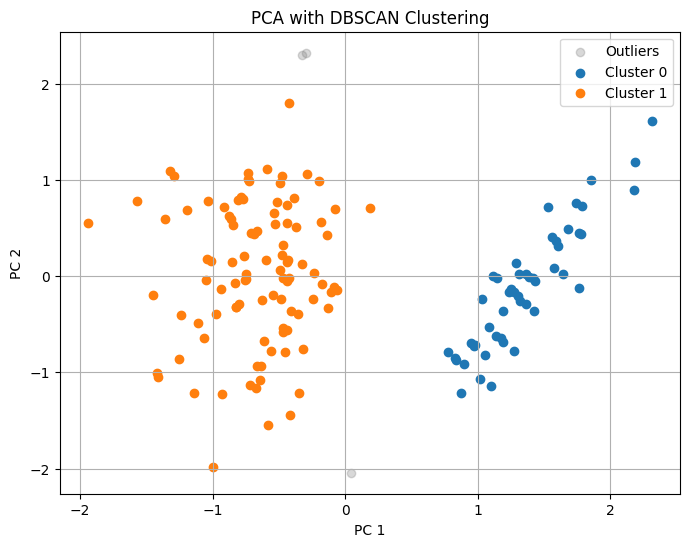

Clustering Time: 0.0042 seconds


In [65]:
#DBSCAN 결과를 확인합니다.
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(dbscan_clusters)
for cluster_num in unique_clusters:
    if cluster_num == -1:
        # Outliers are labeled as -1 in DBSCAN
        plt.scatter(components_result[dbscan_clusters == cluster_num, 0],
                    components_result[dbscan_clusters == cluster_num, 1],
                    label='Outliers', color='gray', alpha=0.3)
    else:
        plt.scatter(components_result[dbscan_clusters == cluster_num, 0],
                    components_result[dbscan_clusters == cluster_num, 1],
                    label=f'Cluster {cluster_num}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with DBSCAN Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {dbscan_time:.4f} seconds") #DBSCAN이 수행되는 시간을 출력합니다.

###result

In [66]:
import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

In [84]:
clustering_result = [kmeans_clusters, gmm_clusters, hierarchical_clusters, dbscan_clusters]
time_result = [kmeans_time, gmm_time, hierarchical_time, dbscan_time]

Clustering_Algorithms = ['k-means Clustering', 'GMM Clustering', 'Hierarchical Clustering', 'DBSCAN']

In [85]:
for clusters, time_taken, algorithms in zip(clustering_result, time_result, Clustering_Algorithms):
    score = metrics.silhouette_score(components_result, clusters)
    print('Silhouette score of {} is {} and it took {:.4f} seconds.'.format(algorithms, score, time_taken))

Silhouette score of k-means Clustering is 0.5284289962068811 and it took 0.1084 seconds.
Silhouette score of GMM Clustering is 0.5277340678053974 and it took 0.0356 seconds.
Silhouette score of Hierarchical Clustering is 0.5284289962068811 and it took 2.5558 seconds.
Silhouette score of DBSCAN is 0.5139041577787248 and it took 0.0042 seconds.


####Q2-3. Silhouette Score와 수행 시간을 각각 비교해주세요.

- Silhouette Score: k-means = Hierachial > GMM > DBSCAN
- 수행시간: Hierarchial > k-means > GMM > DBSCAN

####Q2-4. 최종적으로 가장 클러스터링을 잘 수행한 알고리즘이 무엇인지 작성하고, 그렇게 생각한 이유를 적어주세요.

실루엣 계수가 가장 높으면서 시간이 상대적으로 짧은 k-means clustering이 가장 클러스터링을 잘 수행한 것으로 보인다.

##2) with wine data set

###데이터 & 라이브러리

In [86]:
#wine 데이터 불러오기(라벨을 제거한 데이터)
data = pd.read_csv('/content/drive/MyDrive/DSL/2023_2/기초세션/[230725]_Unsupervised_Learning/wine_data.csv')

In [87]:
data.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [88]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import time

###데이터 전처리

In [89]:
#데이터를 스케일링 해줍니다.
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

###PCA 수행

In [90]:
pca = PCA(n_components = 13) #feature의 수만큼 PCA를 수행해 주세요.(hint: 위의 데이터 프레임을 확인해보세요!)
pca_data = pca.fit_transform(scaled_data)

In [91]:
explained_variance = pca.explained_variance_ratio_

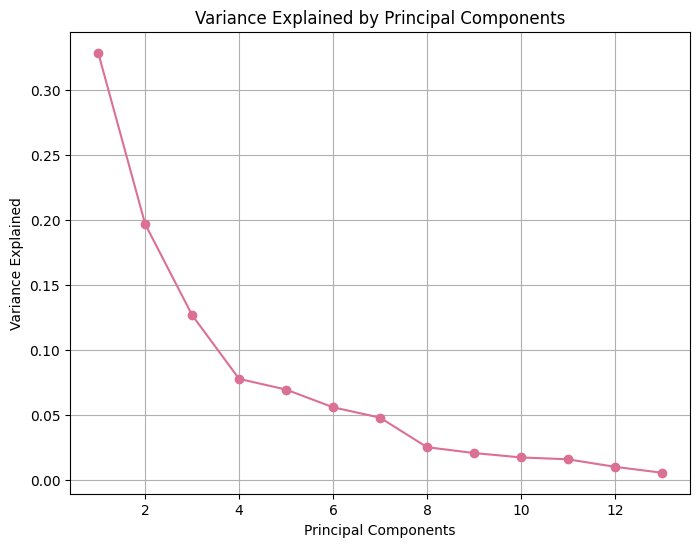

In [92]:
#주성분마다 설명할 수 있는 분산에 대한 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='palevioletred')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.grid()
plt.show()

In [93]:
#주성분에 따라 분산의 누적을 계산합니다.
cumulative_variance = np.cumsum(explained_variance)

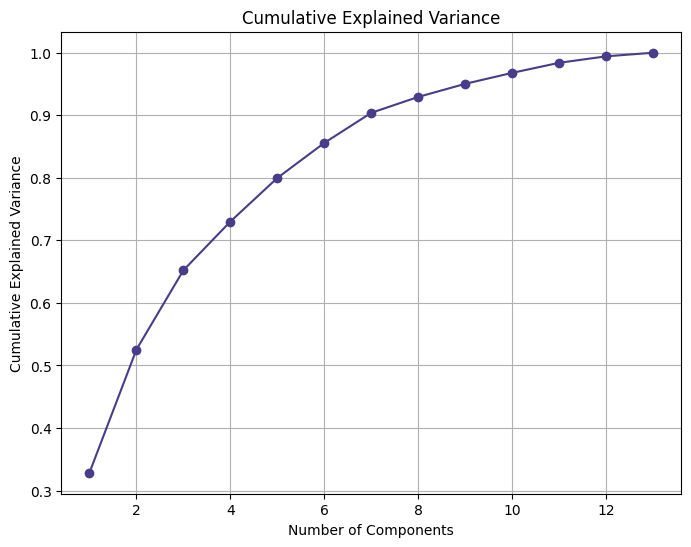

In [94]:
#주성분 수에 따른 누적 분산 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='darkslateblue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid()
plt.show()

####Q2-5. 몇 번째 주성분까지 선택하여 사용할 것인지와 그 이유를 작성해주세요.

6개 사용
- elbow point는 4개에서 형성되는 것으로 보이지만 전체 설명력이 80%에 미치지 못하므로 6개 사용

In [95]:
n_components = 6 #위에서 답변한 주성분의 개수를 입력해주세요.

In [96]:
#최종적으로 지정해준 수 만큼 PCA 결과, 차원이 축소됩니다.
pca_result = PCA(n_components = n_components)
components_result = pca.fit_transform(scaled_data)

In [97]:
#선택한 주성분이 최종적으로 전체 분산 중 얼마를 설명할 수 있는지 확인할 수 있습니다.
for i in range(1, n_components+1):
  explained=np.sum(pca.explained_variance_ratio_[:i])
  print('The variance explained by the ', i, 'latent variables is {:.2f}%'.format(explained*100))

The variance explained by the  1 latent variables is 32.85%
The variance explained by the  2 latent variables is 52.53%
The variance explained by the  3 latent variables is 65.22%
The variance explained by the  4 latent variables is 73.01%
The variance explained by the  5 latent variables is 79.98%
The variance explained by the  6 latent variables is 85.58%


###Clustering

In [98]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

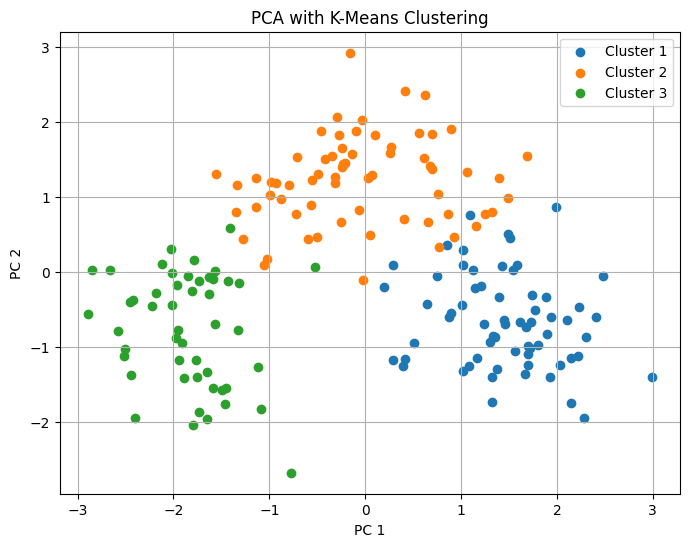

Clustering Time: 0.0446 seconds


In [99]:
#k-means Clustering을 수행합니다.
start_time = time.time()

n_centroids = 3 #직접 지정해주세요.

kmeans = KMeans(n_clusters = n_centroids, random_state = 17)
kmeans_clusters = kmeans.fit_predict(components_result)

end_time = time.time()
kmeans_time = end_time - start_time #k-means Clustering이 수행되는 시간을 구합니다.

#k-means Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_centroids):
    plt.scatter(components_result[kmeans_clusters == cluster_num, 0],
                components_result[kmeans_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with K-Means Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {kmeans_time:.4f} seconds") #k-means Clustering이 수행되는 시간을 출력합니다.

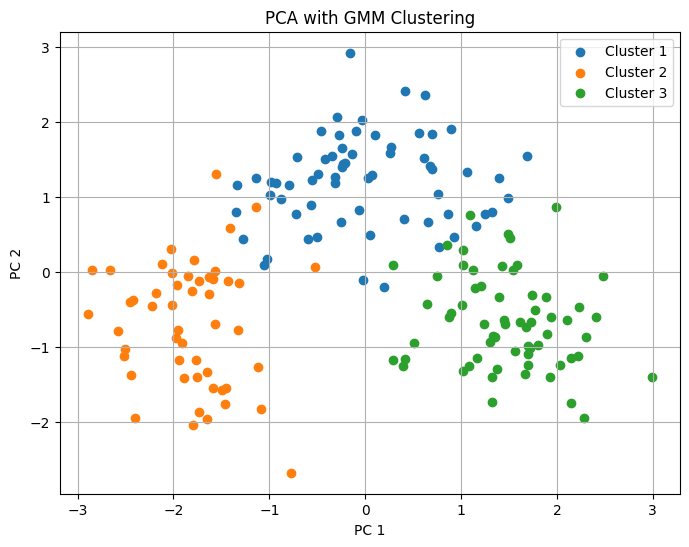

Clustering Time: 0.0292 seconds


In [100]:
#GMM Clustering을 수행합니다.
start_time = time.time()

n_gaussians = 3 #직접 지정해주세요.

gmm = GaussianMixture(n_components = n_gaussians, random_state=17)
gmm_clusters = gmm.fit_predict(components_result)

end_time = time.time()
gmm_time = end_time - start_time #GMM Clustering이 수행되는 시간을 구합니다.

#GMM Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_gaussians):
    plt.scatter(components_result[gmm_clusters == cluster_num, 0],
                components_result[gmm_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with GMM Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {gmm_time:.4f} seconds") #GMM Clustering이 수행되는 시간을 출력합니다.

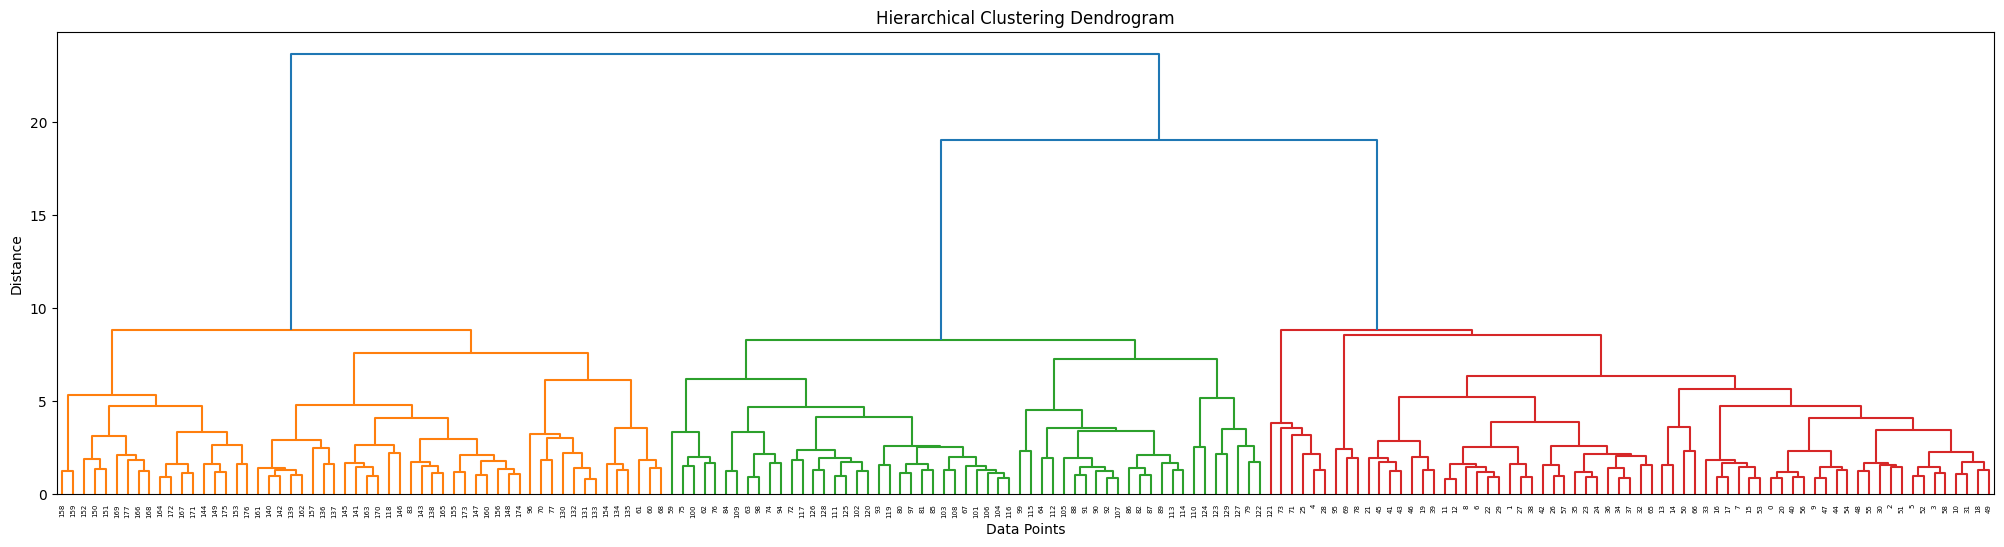

In [101]:
#Hierarchical Clustering을 수행합니다.
start_time = time.time()

#덴드로그램을 그려봅니다.
linkage_matrix = linkage(components_result, method='ward')
plt.figure(figsize=(25, 6))
dendrogram(linkage_matrix, labels=None)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

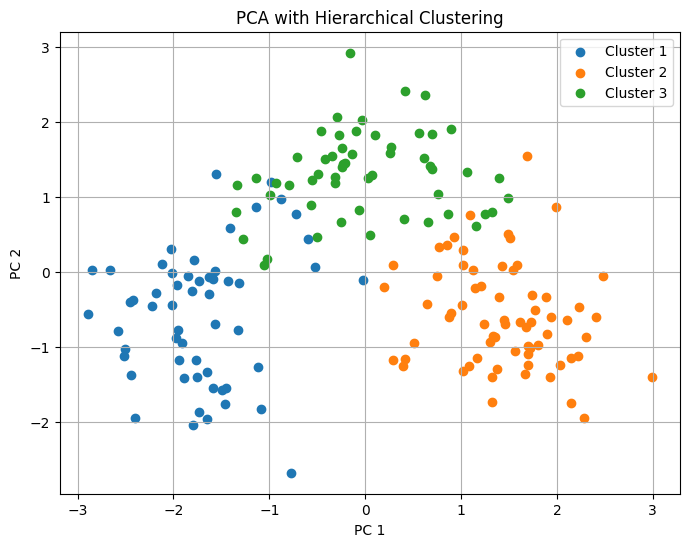

Clustering Time: 14.3126 seconds


In [102]:
n_clusters = 3 #직접 지정해주세요.

hierarchical = AgglomerativeClustering(n_clusters = n_clusters)
hierarchical_clusters = hierarchical.fit_predict(components_result)

end_time = time.time()
hierarchical_time = end_time - start_time #Hierarchical Clustering이 수행되는 시간을 구합니다.

#Hierarchical Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_clusters):
    plt.scatter(components_result[hierarchical_clusters == cluster_num, 0],
                components_result[hierarchical_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with Hierarchical Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {hierarchical_time:.4f} seconds") #Hierarchical Clustering이 수행되는 시간을 출력합니다.

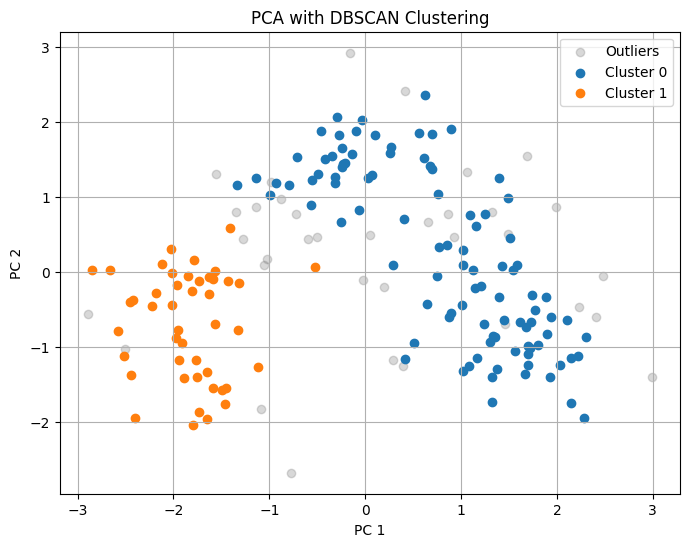

Clustering Time: 0.0138 seconds


In [122]:
#DBSCAN을 수행합니다.
start_time = time.time()

dbscan = DBSCAN(eps = 1.7, min_samples = 5) #DBSCAN을 수행하기 위한 반경과 minPts를 지정해줍니다. 여러 번 수행하면서 결과가 잘 나오게끔 값을 변경해보세요!
dbscan_clusters = dbscan.fit_predict(components_result)

end_time = time.time()
dbscan_time = end_time - start_time #DBSCAN이 수행되는 시간을 구합니다.

#DBSCAN 결과를 확인합니다.
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(dbscan_clusters)
for cluster_num in unique_clusters:
    if cluster_num == -1:
        # Outliers are labeled as -1 in DBSCAN
        plt.scatter(components_result[dbscan_clusters == cluster_num, 0],
                    components_result[dbscan_clusters == cluster_num, 1],
                    label='Outliers', color='gray', alpha=0.3)
    else:
        plt.scatter(components_result[dbscan_clusters == cluster_num, 0],
                    components_result[dbscan_clusters == cluster_num, 1],
                    label=f'Cluster {cluster_num}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with DBSCAN Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {dbscan_time:.4f} seconds") #DBSCAN이 수행되는 시간을 출력합니다.

####DBSCAN bonus

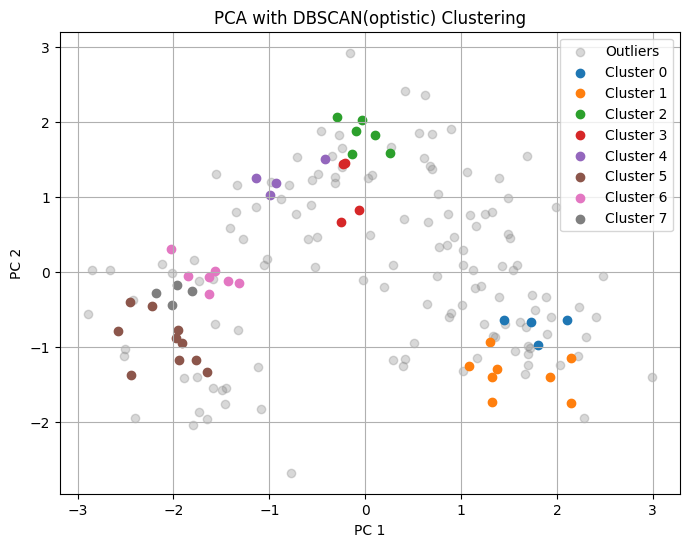

Clustering Time: 0.1154 seconds


In [123]:
#위에서 수행해보셨다면, 직접 변수를 지정하기 힘드셨을 겁니다. sklearn에서는 최적화된 eps를 구할 수 있는 패키지를 제공합니다!
from sklearn.cluster import OPTICS

start_time = time.time()

optics = OPTICS(min_samples=4) #추가로, 2차원에서 클러스터링을 할 때 DBSCAN은 minPts = 4로 지정하다는 것이 가장 좋다는 논문 내용이 있습니다!
clusters = optics.fit_predict(components_result)

end_time = time.time()
clustering_time = end_time - start_time

plt.figure(figsize=(8, 6))
unique_clusters = np.unique(clusters)
for cluster_num in unique_clusters:
    if cluster_num == -1:
        # Outliers are labeled as -1 in OPTICS
        plt.scatter(components_result[clusters == cluster_num, 0],
                    components_result[clusters == cluster_num, 1],
                    label='Outliers', color='gray', alpha=0.3)
    else:
        plt.scatter(components_result[clusters == cluster_num, 0],
                    components_result[clusters == cluster_num, 1],
                    label=f'Cluster {cluster_num}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with DBSCAN(optistic) Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {clustering_time:.4f} seconds")

###result

In [124]:
import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

In [125]:
clustering_result = [kmeans_clusters, gmm_clusters, hierarchical_clusters, dbscan_clusters]
time_result = [kmeans_time, gmm_time, hierarchical_time, dbscan_time]

Clustering_Algorithms = ['k-means Clustering', 'GMM Clustering', 'Hierarchical Clustering', 'DBSCAN']

In [126]:
for clusters, time_taken, algorithms in zip(clustering_result, time_result, Clustering_Algorithms):
    score = metrics.silhouette_score(components_result, clusters)
    print('Silhouette score of {} is {} and it took {:.4f} seconds.'.format(algorithms, score, time_taken))

Silhouette score of k-means Clustering is 0.2648892514217511 and it took 0.0446 seconds.
Silhouette score of GMM Clustering is 0.2627285748291147 and it took 0.0292 seconds.
Silhouette score of Hierarchical Clustering is 0.25629277931916994 and it took 14.3126 seconds.
Silhouette score of DBSCAN is 0.20009644408348531 and it took 0.0138 seconds.


####Q2-5. Silhouette Score와 수행 시간을 각각 비교해주세요.

- Silhouette Score: k-means > GMM > Hierarchial > DBSCAN
- Runtime: Hierarchial > k-means > GMM > DBSCAN

####Q2-6. iris data set에 비하여, wine data set에서 결과가 나쁘게 나온 이유가 무엇일지 작성해주세요.

- 종이 명확하게 구분되어있는 iris data set에 비해 wine data set은 와인 간의 명확한 차이가 두드러지지 않기 때문일 것으로 예상된다.
- 또는 wine data set에 적용한 pca가 적절한 차원축소 방법이 아니었을 가능성이 있다.

#3. Non-Linear Feature Extraction + k-means Clustering 성능 비교

클러스터링이 잘 이루어지지 않은 wine data에 대해서 다른 차원축소 알고리즘을 적용한 뒤, k-means Clustering을 수행해봅시다!

##데이터 & 라이브러리

In [127]:
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
!pip install umap-learn -q
import umap

from sklearn.cluster import KMeans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [128]:
#wine 데이터 불러오기(라벨을 제거한 데이터)
data = pd.read_csv('/content/drive/MyDrive/DSL/2023_2/기초세션/[230725]_Unsupervised_Learning/wine_data.csv')

##데이터 전처리

In [129]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

In [133]:
n_clusters = 3 #직접 클러스터의 수를 지정해주세요.

##1) KPCA + k-means Clustering

In [134]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
kpca_result = kernel_pca.fit_transform(scaled_data)

In [135]:
kmeans = KMeans(n_clusters = n_clusters, random_state = 17)
kmeans.fit(kpca_result)
kpca_labels = kmeans.labels_

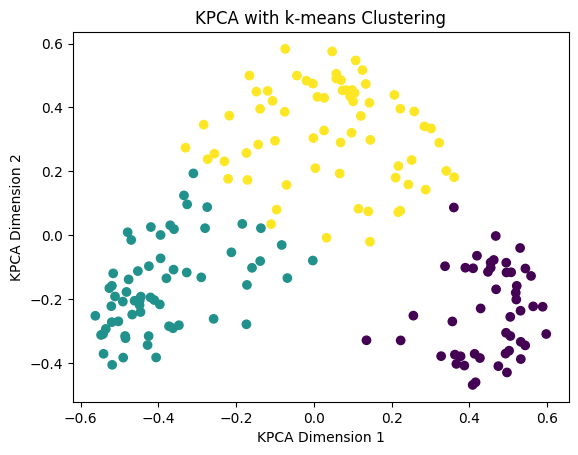

In [136]:
plt.scatter(kpca_result[:, 0], kpca_result[:, 1], c=kpca_labels, cmap='viridis')
plt.xlabel('KPCA Dimension 1')
plt.ylabel('KPCA Dimension 2')
plt.title('KPCA with k-means Clustering')
plt.show()

##2) t-SNE + k-means Clustering

In [140]:
tsne = TSNE(n_components = 2, random_state = 17)
tsne_result = tsne.fit_transform(scaled_data)

In [141]:
kmeans = KMeans(n_clusters = n_clusters, random_state = 17)
kmeans.fit(tsne_result)
tsne_labels = kmeans.labels_

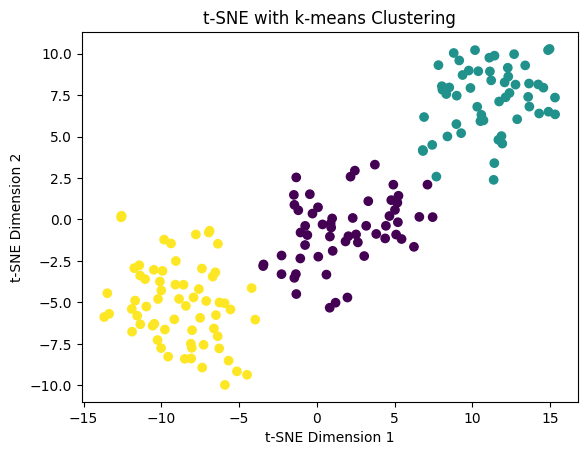

In [142]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=tsne_labels, cmap='viridis')
plt.title('t-SNE with k-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

##3) UMAP + k-means Clustering

In [143]:
reducer = umap.UMAP()
umap_result = reducer.fit_transform(scaled_data)

In [144]:
kmeans = KMeans(n_clusters = n_clusters, random_state = 17)
kmeans.fit(umap_result)
umap_labels = kmeans.labels_

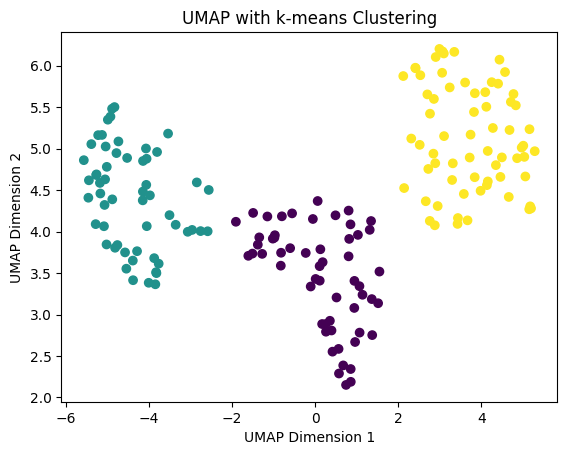

In [145]:
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=umap_labels, cmap='viridis')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP with k-means Clustering')
plt.show()

##조합 별 성능 측정(Silhouette Score)

In [148]:
#KPCA 결과
silhouette_result = silhouette_score(kpca_result, kpca_labels)
print('Silhouette score is {}.'.format(silhouette_result))

Silhouette score is 0.5834639810443856.


In [149]:
#t-SNE 결과
silhouette_result = silhouette_score(tsne_result, tsne_labels)
print('Silhouette score is {}.'.format(silhouette_result))

Silhouette score is 0.6049494743347168.


In [150]:
#UMAP 결과
silhouette_result = silhouette_score(umap_result, umap_labels)
print('Silhouette score is {}.'.format(silhouette_result))

Silhouette score is 0.6514891982078552.


##result

####Q3-1. 어떤 조합의 알고리즘에서 Silhouette Score가 가장 높게 나타났나요? (부등호로 크기를 비교해주세요.)

UMAP > t-SNE > KPCA

####Q3-2. wine data set을 PCA로 차원축소 했을 때보다 KPCA, t-SNE, UMAP을 통해 차원축소하여 클러스터링 한 결과가 더 좋았다면, 그 이유가 무엇인지 작성해주세요.

데이터의 형태가 다른 차원축소를 활용하기에 더 적절한 형태를 갖고 있었을 것이다.

####Q3-3. 최종적으로 wine data set에 대해 가장 성능이 좋았던 알고리즘이 무엇이며, 그 차원축소 방식의 특징을 두 가지 이상 작성해주세요.

가장 성능이 좋았던 두 가지 알고리즘은 UMAP과 t-SNE이다.